In [20]:
import pandas as pd
import numpy as np

In [22]:
hate = pd.read_csv("labeled_data.csv")

In [24]:
hate

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [26]:
hate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [28]:
hate.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [30]:
hate.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [32]:
hate["labels"] = hate["class"].map({
    0: "hate speech",
    1: "offensive language",
    2: "no hate or offense"
}).fillna("no hate or offense")

In [34]:
hate

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,no hate or offense
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",no hate or offense
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,offensive language


In [44]:
offense = hate[["tweet", "labels"]].copy()
offense["tweet"] = offense["tweet"].apply()

TypeError: Series.apply() missing 1 required positional argument: 'func'

In [46]:
offense

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,no hate or offense
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,"you've gone and broke the wrong heart baby, an...",no hate or offense
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,youu got wild bitches tellin you lies,offensive language


In [48]:
import re
import nltk
import string

In [49]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [52]:
stemmer = nltk.SnowballStemmer("english")

In [54]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [56]:
stemmer

In [58]:
def clean_data(text):
    text = str(text).lower()
    text = re.sub(r"http|s:?//\S+|www\.\S+", '', text)         
    text = re.sub(r"\[.*?\]", '', text)                        
    text = re.sub(r"<.*?>+", '', text)                         
    text = re.sub(r"[%s]" % re.escape(string.punctuation), '', text)  
    text = re.sub(r"\n", '', text)                            
    text = re.sub(r"\w*\d\w*", '', text)                      
    text = [word for word in text.split() if word not in stop_words]  
    text = ' '.join(text)
    text = [stemmer.stem(word) for word in text.split()]     
    text = ' '.join(text)

    return text

In [60]:
sample_text = "Visit https://example.com or check www.website.com!"
result = clean_data(sample_text)
print(result)

visit check


In [62]:
offense

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,no hate or offense
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,"you've gone and broke the wrong heart baby, an...",no hate or offense
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,youu got wild bitches tellin you lies,offensive language


In [64]:
X = np.array(offense["tweet"])
y = np.array(offense["labels"])

In [66]:
X

array(["!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...",
       '!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!',
       '!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit',
       ...,
       'young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again',
       'youu got wild bitches tellin you lies',
       '~~Ruffled | Ntac Eileen Dahlia - Beautiful color combination of pink, orange, yellow &amp; white. A Coll http://t.co/H0dYEBvnZB'],
      dtype=object)

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [70]:
c_v = CountVectorizer()
X = c_v.fit_transform(X)

In [72]:
X

<24783x35852 sparse matrix of type '<class 'numpy.int64'>'
	with 324058 stored elements in Compressed Sparse Row format>

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [76]:
X_train

<16604x35852 sparse matrix of type '<class 'numpy.int64'>'
	with 217297 stored elements in Compressed Sparse Row format>

In [78]:
y_train = pd.Series(y_train).reset_index(drop=True)
y_train = y_train.fillna("no hate or offense")

In [80]:
y_train

0        offensive language
1        offensive language
2        offensive language
3        offensive language
4        offensive language
                ...        
16599    no hate or offense
16600    offensive language
16601    offensive language
16602    offensive language
16603    offensive language
Length: 16604, dtype: object

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dt =DecisionTreeClassifier()

In [86]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [88]:
y_pred = dt.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix,accuracy_score
c_m = confusion_matrix(y_test, y_pred)
c_m

array([[ 120,   45,  300],
       [  20, 1192,  167],
       [ 198,  168, 5969]], dtype=int64)

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

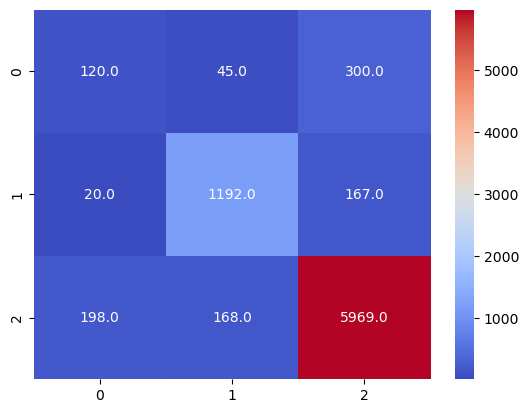

In [93]:
sns.heatmap(c_m, annot=True,fmt=".1f",cmap="coolwarm")
plt.show()

In [96]:
accuracy_score=(accuracy_score(y_test,y_pred)*100)

In [98]:
accuracy_score

89.02066267269836

In [100]:
sample_text ="I want to kill you so much!"
cleaned_data = clean_data(sample_text)
cleaned_data

'want kill much'

In [102]:
input = c_v.transform([sample_text]).toarray()

In [104]:
input

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [106]:
dt.predict(input)

array(['no hate or offense'], dtype=object)